<a href="https://colab.research.google.com/github/umamah333/image-segmentation-using-UNET-model-from-scratch/blob/main/UMAMAH_USMAN_IMAGE_SEGMENTATIONipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Segmentation Task COCO-2017**


*   **Library Files:**




In [ ]:
import os
import sys
import random
import math
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras
from keras import layers
import matplotlib.patches as patches
from matplotlib.colors import to_rgba

from google.colab.patches import cv2_imshow
%matplotlib inline
from pycocotools.coco import COCO
from pycocotools import mask as cocomask
import shutil
import skimage.io as io
from google.colab import drive
import pylab
import tensorflow as tf
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from copy import deepcopy
from pycocotools.coco import COCO
import json
import pandas as pd
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
from keras.metrics import MeanIoU
from keras.metrics import BinaryAccuracy
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras import models
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array


plt.rcParams['font.family'] = 'sans-serif'  #  a generic sans-serif font
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


**Exploratory Data Analysis EDA**

In [ ]:
#PATHS DEFINITION

data_setname = 'image segmentation COCO-2017'

# Setting the paths to my data folder and JSON files
data_dir = '/content/drive/MyDrive/image_segmentation_w'
train_images_path = os.path.join(data_dir, 'train-300', 'data')
validation_images_path = os.path.join(data_dir, 'validation-300', 'data')
train_json = os.path.join(data_dir, 'train-300', 'labels.json')
val_json = os.path.join(data_dir,'validation-300', 'labels.json')

# Define the categories you want to keep
keep_categories = ['person', 'dog', 'car', 'cake']


In [ ]:
#loading annotations into memory
coco = COCO(train_json)
coco_val = COCO(val_json)

loading annotations into memory...
Done (t=0.88s)
creating index...
index created!
loading annotations into memory...
Done (t=0.67s)
creating index...
index created!


In [ ]:
#reading JSON files for analysing DATA

# Reading the json file for train images
with open(train_json, 'r') as f:
    root = json.load(f)

print(root.keys())

# Reading json file for validation images
with open(val_json, 'r') as ff:
  root2 = json.load(ff)

root2.keys()


dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])


dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])

In [ ]:
# Basic  Information for images, bounding boxes, categories
#heights and widths for our information


#TRAIN DATASET ANALYSIS
n_images = len(root['images'])
n_boxes = len(root['annotations'])
n_categ = len(root['categories'])

# height, width
heights = [x['height'] for x in root['images']]
widths = [x['width'] for x in root['images']]



print('\n\n')
print('Dataset Name: ',data_setname)
print('Number of images in train: ',n_images)
print('Number of bounding boxes: ', n_boxes)
print('Number of classes: ', n_categ)
print('Max min avg height: ', max(heights), min(heights), int(sum(heights)/len(heights)))
print('Max min avg width: ', max(widths), min(widths), int(sum(widths)/len(widths)))
print('\n\n')



#VALIDATION DATASET ANALYSIS
n_images_val = len(root2['images'])
n_boxes_val = len(root2['annotations'])
n_categ_val = len(root2['categories'])

# height, width
heights_val = [x['height'] for x in root['images']]
widths_val = [x['width'] for x in root['images']]





print('Number of images in validation: ',n_images_val)
print('Number of bounding boxes: ', n_boxes_val)
print('Number of classes: ', n_categ_val)
print('Max min avg height: ', max(heights_val), min(heights_val), int(sum(heights_val)/len(heights_val)))
print('Max min avg width: ', max(widths_val), min(widths_val), int(sum(widths_val)/len(widths_val)))




Dataset Name:  image segmentation COCO-2017
Number of images in train:  300
Number of bounding boxes:  3870
Number of classes:  63
Max min avg height:  640 270 475
Max min avg width:  640 333 595



Number of images in validation:  300
Number of bounding boxes:  3774
Number of classes:  67
Max min avg height:  640 270 475
Max min avg width:  640 333 595


In [ ]:


# Bar Charts
fig_bar = make_subplots(rows=1, cols=2, subplot_titles=['Number of Images', 'Number of Bounding Boxes'])

# Training Dataset
fig_bar.add_trace(go.Bar(x=['Training'], y=[n_images], name='Number of Images', marker_color='pink'), row=1, col=1)
fig_bar.add_trace(go.Bar(x=['Training'], y=[n_boxes], name='Number of Bounding Boxes', marker_color='pink'), row=1, col=2)

# Validation Dataset
fig_bar.add_trace(go.Bar(x=['Validation'], y=[n_images_val], name='Number of Images', marker_color='green'), row=1, col=1)
fig_bar.add_trace(go.Bar(x=['Validation'], y=[n_boxes_val], name='Number of Bounding Boxes', marker_color='green'), row=1, col=2)

fig_bar.update_layout(title_text='Bar Charts', barmode='group', height=400, width=800)

# Histograms
fig_hist = make_subplots(rows=1, cols=2, subplot_titles=['Height Distribution', 'Width Distribution'])

# Training Dataset
fig_hist.add_trace(go.Histogram(x=heights, nbinsx=20, name='Training', opacity=0.7, marker_color='pink'), row=1, col=1)
fig_hist.add_trace(go.Histogram(x=widths, nbinsx=20, name='Training', opacity=0.7, marker_color='pink'), row=1, col=2)

# Validation Dataset
fig_hist.add_trace(go.Histogram(x=heights_val, nbinsx=20, name='Validation', opacity=0.7, marker_color='green'), row=1, col=1)
fig_hist.add_trace(go.Histogram(x=widths_val, nbinsx=20, name='Validation', opacity=0.7, marker_color='green'), row=1, col=2)

fig_hist.update_layout(title_text='Histograms', height=400, width=800)

# Show the plots
fig_bar.show()
fig_hist.show()

In [ ]:
# Objects per image distribution

img2nboxes = {} # mapping "image id" to "number of boxes"

for ann in root['annotations']:
    img_id = ann['image_id']

    if img_id in img2nboxes.keys():
        img2nboxes[img_id] += 1
    else:
        img2nboxes[img_id] = 1

nboxes_list = list(img2nboxes.values())

min_nboxes = min(nboxes_list)
max_nboxes = max(nboxes_list)
avg_nboxes = int(sum(nboxes_list)/len(nboxes_list))
out = pd.cut(nboxes_list, bins=np.arange(0,max_nboxes+10,10), include_lowest=True)

counts = out.value_counts().values
labels = [(int(i.left),int(i.right)) for i in out.value_counts().index.categories]

graph_xind = [i[0] for i in labels]
ticks = [ '('+str(i[0])+','+ str(i[1])+')' for i in labels]

# Objects per image distribution

img2nboxes2 = {} # mapping "image id" to "number of boxes"

for ann in root2['annotations']:
    img_id = ann['image_id']

    if img_id in img2nboxes2.keys():
        img2nboxes2[img_id] += 1
    else:
        img2nboxes2[img_id] = 1

nboxes_list2 = list(img2nboxes2.values())

min_nboxes2 = min(nboxes_list2)
max_nboxes2 = max(nboxes_list2)
avg_nboxes2 = int(sum(nboxes_list2)/len(nboxes_list2))


counts2 = out.value_counts().values
labels2 = [(int(i.left),int(i.right)) for i in out.value_counts().index.categories]

graph_xind2 = [i[0] for i in labels]
ticks2 = [ '('+str(i[0])+','+ str(i[1])+')' for i in labels]

# Create a bar chart for the train dataset with narrower bars
trace1 = go.Bar(
    x=graph_xind,
    y=counts,
    text=ticks,
    name='train-dataset',
    marker=dict(color='blue'),
    width=1  # Adjust the width as needed
)

# Create a bar chart for the validation dataset with narrower bars
trace2 = go.Bar(
    x=graph_xind2,
    y=counts2,
    text=ticks2,
    name='validation-dataset',
    marker=dict(color='orange'),
    width=1  # Adjust the width as needed
)

# Setting the layout
layout = go.Layout(
    title='Number of objects distribution over the dataset (train, validation images)',
    xaxis=dict(title='Number of objects'),
    yaxis=dict(title='Number of images'),
    barmode='group',
    bargap=0.2,  # Adjust the gap between bars as needed
    showlegend=True
)

# Create the figure and add traces with adjusted figsize
fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.update_layout(width=800)  # Set the desired figure width

# Show the plot
fig.show()

In [ ]:
# Class distribution
class2nboxes = {}

for ann in root['annotations']:
    cat_id = ann['category_id']

    if cat_id in class2nboxes.keys():
        class2nboxes[cat_id] += 1
    else:
        class2nboxes[cat_id] = 1

sorted_c2nb = [(k,v)for k, v in sorted(class2nboxes.items(), reverse=True, key=lambda item: item[1])]

# top 20 classes
top = min(len(sorted_c2nb),20)


categ_map = {x['id']: x['name'] for x in root['categories']}
for k in categ_map.keys():
    print(k,'->',categ_map[k], end=", ")


# Class distribution
class2nboxes2 = {}

for ann in root2['annotations']:
    cat_id = ann['category_id']

    if cat_id in class2nboxes2.keys():
        class2nboxes2[cat_id] += 1
    else:
        class2nboxes2[cat_id] = 1

sorted_c2nb2 = [(k,v)for k, v in sorted(class2nboxes2.items(), reverse=True, key=lambda item: item[1])]

# top 20 classes
top2 = min(len(sorted_c2nb2),20)

categ_map2 = {x['id']: x['name'] for x in root2['categories']}
for k in categ_map2.keys():
    print(k,'->',categ_map2[k], end=", ")

0 -> airplane, 1 -> backpack, 2 -> banana, 3 -> baseball bat, 4 -> baseball glove, 5 -> bear, 6 -> bench, 7 -> bicycle, 8 -> bird, 9 -> boat, 10 -> book, 11 -> bottle, 12 -> bowl, 13 -> broccoli, 14 -> bus, 15 -> cake, 16 -> car, 17 -> carrot, 18 -> cat, 19 -> cell phone, 20 -> chair, 21 -> clock, 22 -> cow, 23 -> cup, 24 -> dining table, 25 -> dog, 26 -> donut, 27 -> elephant, 28 -> fire hydrant, 29 -> fork, 30 -> frisbee, 31 -> giraffe, 32 -> handbag, 33 -> horse, 34 -> hot dog, 35 -> kite, 36 -> knife, 37 -> laptop, 38 -> motorcycle, 39 -> oven, 40 -> parking meter, 41 -> person, 42 -> pizza, 43 -> potted plant, 44 -> refrigerator, 45 -> remote, 46 -> sandwich, 47 -> scissors, 48 -> skateboard, 49 -> skis, 50 -> spoon, 51 -> sports ball, 52 -> stop sign, 53 -> suitcase, 54 -> surfboard, 55 -> tennis racket, 56 -> tie, 57 -> traffic light, 58 -> train, 59 -> truck, 60 -> umbrella, 61 -> vase, 62 -> wine glass, 0 -> airplane, 1 -> apple, 2 -> backpack, 3 -> banana, 4 -> baseball bat, 

In [ ]:
# Select the top 20 categories for better visualization
top = min(len(sorted_c2nb), 20)

# Create bar chart for the train dataset
trace1 = go.Bar(
    x=np.arange(top),
    y=[i[1] for i in sorted_c2nb[:top]],
    text=[i[0] for i in sorted_c2nb[:top]],
    name='train',
    marker=dict(color='yellow'),
    width=0.4
)

# Create bar chart for the validation dataset
trace2 = go.Bar(
    x=np.arange(top) + 0.4,
    y=[i[1] for i in sorted_c2nb2[:top]],
    text=[i[0] for i in sorted_c2nb2[:top]],
    name='validation',
    marker=dict(color='red'),
    width=0.4
)

# Setting the layout
layout = go.Layout(
    xaxis=dict(title='Category Id'),
    yaxis=dict(title='Number of boxes'),
    title='Class distribution (decreasing order)',
    showlegend=True
)

# Create the figure and add traces with adjusted figsize
fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.update_layout(width=800, height=500)  # Set the desired figure size

# Show the plot
fig.show()

In [ ]:
# Count the number of annotations for each category in the training set
category_counts_train = {category: 0 for category in keep_categories}
for annotation in root['annotations']:
    category = coco.loadCats(annotation['category_id'])[0]['name']
    if category in keep_categories:
        category_counts_train[category] += 1

# Count the number of annotations for each category in the validation set
category_counts_val = {category: 0 for category in keep_categories}
for annotation in root2['annotations']:
    category = coco_val.loadCats(annotation['category_id'])[0]['name']
    if category in keep_categories:
        category_counts_val[category] += 1

# Create a DataFrame for Plotly
import pandas as pd

data = {'Category': list(category_counts_train.keys()),
        'Train': list(category_counts_train.values()),
        'Validation': list(category_counts_val.values())}

df = pd.DataFrame(data)

# Create a Figure
fig = go.Figure()

# Add bar traces
fig.add_trace(go.Bar(x=df['Category'], y=df['Train'], name='Train'))
fig.add_trace(go.Bar(x=df['Category'], y=df['Validation'], name='Validation'))

# Add vertical lines
for category, count_train, count_val in zip(df['Category'], df['Train'], df['Validation']):
    fig.add_trace(go.Scatter(x=[category, category], y=[count_train, count_val], mode='lines', name=category))

# Set layout
fig.update_layout(
    title='Number of Annotations for Selected Categories',
    xaxis=dict(title='Category'),
    yaxis=dict(title='Number of Annotations'),
    barmode='group'
)

# Show the plot
fig.show()

In [ ]:
def filter_annotations(json_file, output_file):
    # Initialize COCO API
    coco = COCO(json_file)

    # Get category IDs for the categories you want to keep
    cat_ids = coco.getCatIds(catNms=keep_categories)

    # Filter annotations to keep only the specified categories
    filtered_anns = [ann for ann in coco.dataset['annotations'] if ann['category_id'] in cat_ids]

    # Create a new COCO dataset with the filtered annotations
    filtered_dataset = deepcopy(coco.dataset)
    filtered_dataset['annotations'] = filtered_anns
    filtered_coco = COCO()
    filtered_coco.dataset = filtered_dataset
    filtered_coco.createIndex()

    # Save the filtered COCO dataset to a new JSON file
    json.dump(filtered_coco.dataset, open(output_file, 'w'))


In [ ]:
# Filter the training and validation annotations
filter_annotations(train_json, 'train_filtered.json')

filter_annotations(val_json, 'val_filtered.json')

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
creating index...
index created!
loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
creating index...
index created!


In [ ]:
#new json files paths after categories filteration


json_path = "/content/train_filtered.json"
image_folder = "/content/drive/MyDrive/image_segmentation_w/train-300/data"
json_path2 = "/content/val_filtered.json"
image_folder2 = "/content/drive/MyDrive/image_segmentation_w/validation-300/data"

# Create a folder to store the extracted masks in the specified directories where images are already
#present inside
output_folder_train = "/content/drive/MyDrive/image_segmentation_w/train-300/extracted_masks_train"
os.makedirs(output_folder_train, exist_ok=True)

output_folder_validation = '/content/drive/MyDrive/image_segmentation_w/validation-300/extracted_masks_validation'
os.makedirs(output_folder_validation, exist_ok=True)

def extract_masks(json_path, image_folder, output_folder):
    # Initialize COCO API
    coco_data = COCO(json_path)

    # Get all image IDs in the dataset
    image_ids = coco_data.getImgIds()

    for img_id in image_ids:
        # Load image information
        img_info = coco_data.loadImgs(img_id)[0]
        img_filename = img_info['file_name']

        # Load annotations for the image
        ann_ids = coco_data.getAnnIds(imgIds=img_id)
        annotations = coco_data.loadAnns(ann_ids)

        # Create an empty mask for the image
        img_shape = (img_info['height'], img_info['width'])
        mask = np.zeros(img_shape, dtype=np.uint8)

        # Combine masks for each annotation
        for ann in annotations:
            mask += coco_data.annToMask(ann)

        # Save the combined mask
        mask_path = os.path.join(output_folder, f"{img_filename.split('.')[0]}_mask.png")
        cv2.imwrite(mask_path, mask)

    # Print the number of contents in the output folder
    num_contents = len(os.listdir(output_folder))
    print(f"Number of contents in {output_folder} folder: {num_contents}")

if __name__ == "__main__":
    extract_masks(json_path, image_folder, output_folder_train)
    extract_masks(json_path2, image_folder2, output_folder_validation)

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Number of contents in /content/drive/MyDrive/image_segmentation_w/train-300/extracted_masks_train folder: 300
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
Number of contents in /content/drive/MyDrive/image_segmentation_w/validation-300/extracted_masks_validation folder: 300


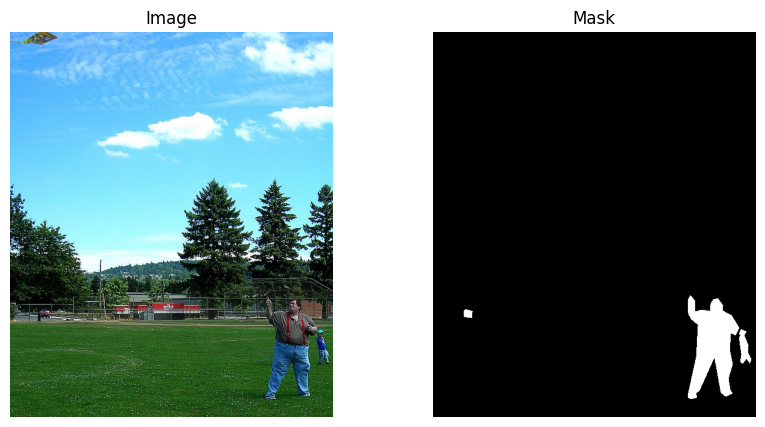

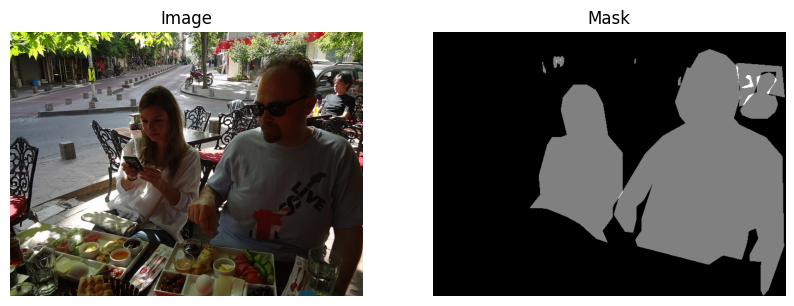

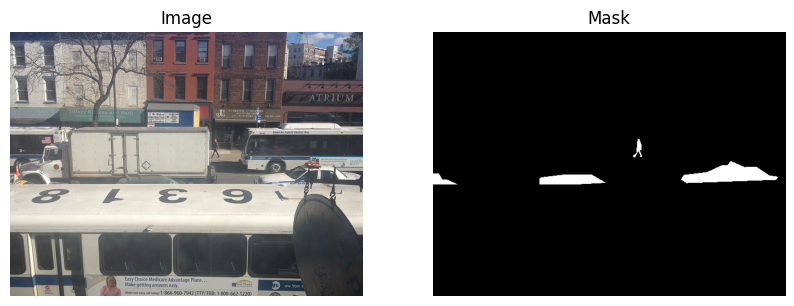

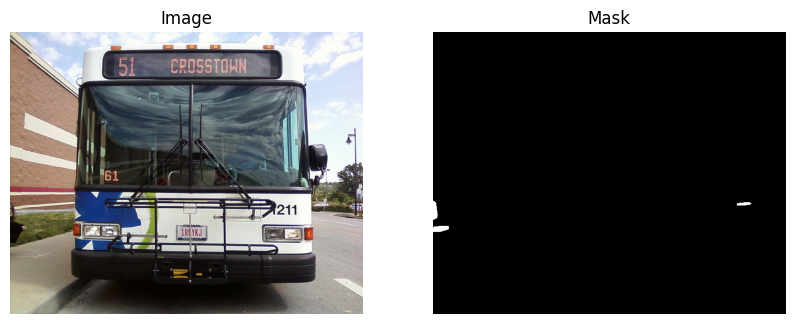

In [ ]:
def visualize_images_and_masks(image_folder, mask_folder, num_samples=2):
    # Get list of image files

    image_files = random.sample(sorted(os.listdir(image_folder)), num_samples)


    for image_file in image_files:
        # Load the image
        image_path = os.path.join(image_folder, image_file)
        image = cv2.imread(image_path)

        # Load the corresponding mask
        mask_file = image_file.replace(".jpg", "_mask.png")
        mask_path = os.path.join(mask_folder, mask_file)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # Plot the image and mask
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(mask, cmap='gray')
        plt.title('Mask')
        plt.axis('off')

        plt.show()

# Visualize samples from the training set
visualize_images_and_masks(image_folder, output_folder_train)

# Visualize samples from the validation set
visualize_images_and_masks(image_folder2, output_folder_validation)

loading annotations into memory...
Done (t=0.39s)
creating index...
index created!


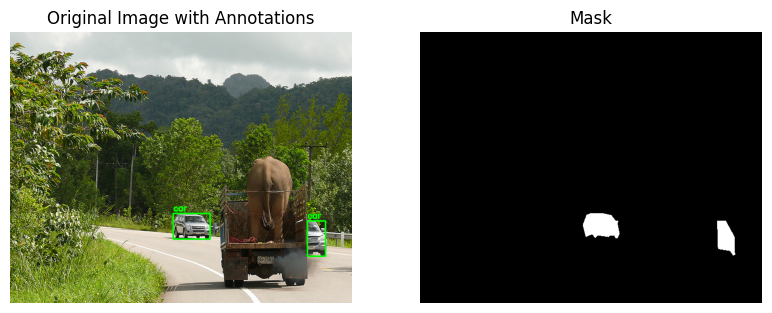

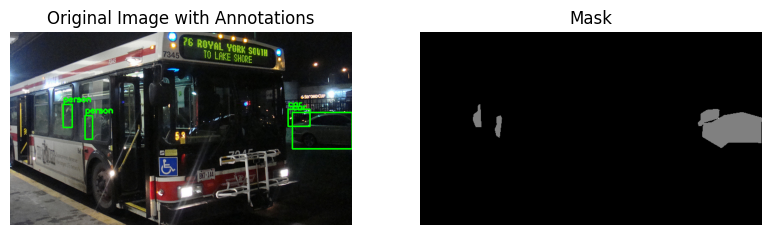

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


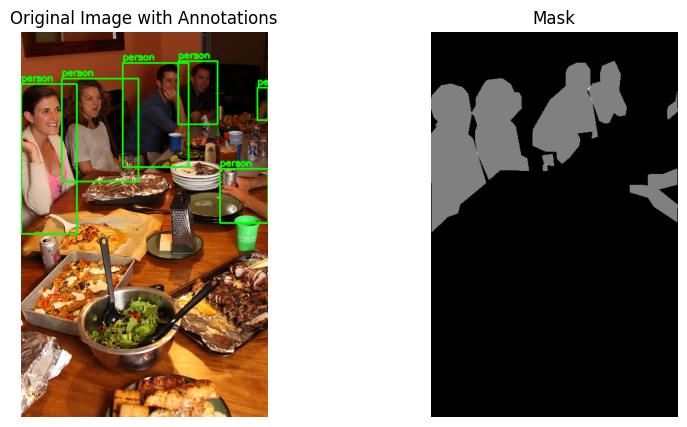

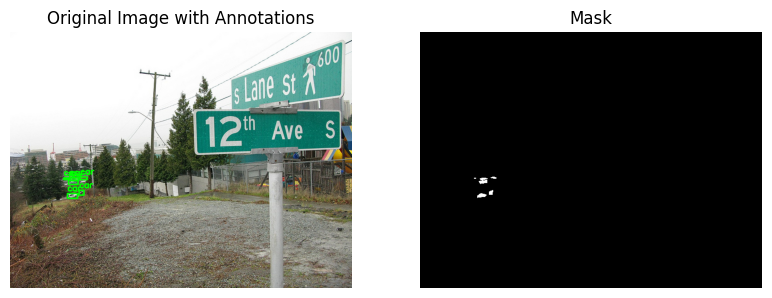

In [ ]:
def load_coco_annotations(annotation_file, image_folder):
    coco = COCO(annotation_file)
    image_ids = coco.getImgIds()

    annotations_by_image = {}

    for image_id in image_ids:
        image_info = coco.loadImgs(image_id)[0]
        annotations = coco.loadAnns(coco.getAnnIds(imgIds=image_info['id']))
        annotations_by_image[image_info['file_name']] = annotations

    return annotations_by_image, coco

def visualize_images_annotations_and_masks(image_folder, mask_folder, annotation_file, num_samples=2):
    # Load COCO-style annotations from the JSON file
    annotations_by_image, coco = load_coco_annotations(annotation_file, image_folder)

    # Get list of image files
    image_files = random.sample(sorted(os.listdir(image_folder)), num_samples)

    for image_file in image_files:
        # Load the original image
        image_path = os.path.join(image_folder, image_file)
        original_image = cv2.imread(image_path)

        # Load the corresponding mask
        mask_file = image_file.replace(".jpg", "_mask.png")
        mask_path = os.path.join(mask_folder, mask_file)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # Get annotations for the current image
        image_annotations = annotations_by_image.get(image_file, [])

        # Draw bounding boxes on the original image based on annotations
        for annotation in image_annotations:
            #  each annotation contains: category_id, bbox (x, y, width, height)
            category_id = annotation['category_id']
            category_name = coco.loadCats(category_id)[0]['name']

            x, y, width, height = annotation['bbox']
            x_max, y_max = x + width, y + height
            cv2.rectangle(original_image, (int(x), int(y)), (int(x_max), int(y_max)), (0, 255, 0), 2)
            cv2.putText(original_image, category_name, (int(x), int(y) - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Plot the images, mask, and annotations
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image with Annotations')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(mask, cmap='gray')
        plt.title('Mask')
        plt.axis('off')



        plt.show()
        # Visualize samples from the training set
visualize_images_annotations_and_masks(image_folder, output_folder_train, json_path)

# Visualize samples from the validation set
visualize_images_annotations_and_masks(image_folder2, output_folder_validation, json_path2)

**Data Pre-Processing**

*   image resizing
*   Images into Numpy arrays


*   Data Reshaping
*   Data Channel re-assurance and Conversion where needed





In [ ]:
#data resizing and normalisation


image=[]
for i in os.listdir('/content/drive/MyDrive/image_segmentation_w/train-300/data'):
  res=cv2.imread(f'/content/drive/MyDrive/image_segmentation_w/train-300/data/{i}')
  image.append(cv2.resize(res,(128,128))/255.0)
mask=[]
for i in os.listdir('/content/drive/MyDrive/image_segmentation_w/train-300/extracted_masks_train'):
  res=cv2.imread(f'/content/drive/MyDrive/image_segmentation_w/train-300/extracted_masks_train/{i}')
  mask.append(cv2.resize(res,(128,128))/255.0)

image_val=[]
for i in os.listdir('/content/drive/MyDrive/image_segmentation_w/validation-300/data'):
  res=cv2.imread(f'/content/drive/MyDrive/image_segmentation_w/validation-300/data/{i}')
  image_val.append(cv2.resize(res,(128,128))/255.0)
mask_val=[]
for i in os.listdir('/content/drive/MyDrive/image_segmentation_w/validation-300/extracted_masks_validation'):
  res=cv2.imread(f'/content/drive/MyDrive/image_segmentation_w/validation-300/extracted_masks_validation/{i}')
  mask_val.append(cv2.resize(res,(128,128))/255.0)

In [ ]:
#analysing images arrays elements to check that are all the contents loaded successfully

original_size_image = len(image)
original_size_mask = len(mask)

# Print the sizes
print(f"Original size of 'image': {original_size_image}")
print(f"Original size of 'mask': {original_size_mask}")

original_size_image_val = len(image_val)
original_size_mask_val = len(mask_val)

# Print the sizes
print(f"Original size of 'image': {original_size_image_val}")
print(f"Original size of 'mask': {original_size_mask_val}")


Original size of 'image': 300
Original size of 'mask': 300
Original size of 'image': 300
Original size of 'mask': 300


In [ ]:
# Convert lists to NumPy arrays
image_array = np.array(image)
mask_array = np.array(mask)

# Check the sizes
original_size_image = image_array.size
original_size_mask = mask_array.size

# Print the sizes
print(f"Original size of 'image': {original_size_image}")
print(f"Original size of 'mask': {original_size_mask}")


# Convert lists to NumPy arrays
image_array_val = np.array(image_val)
mask_array_val = np.array(mask_val)

# Check the sizes
original_size_image_val = image_array.size
original_size_mask_val = mask_array.size

# Print the sizes
print(f"Original size of 'image': {original_size_image_val}")
print(f"Original size of 'mask': {original_size_mask_val}")

Original size of 'image': 14745600
Original size of 'mask': 14745600
Original size of 'image': 14745600
Original size of 'mask': 14745600


In [ ]:


#Reshaping the Data

images=np.array([ i for i in image]).reshape((300,128,128,3))
masks=np.array([ i for i in mask]).reshape((300,128,128,3))

print(images.shape,masks.shape)


images_val=np.array([ i for i in image_val]).reshape((300,128,128,3))
masks_val = np.array([i for i in mask_val]).reshape((300, 128, 128, 3))

images_val.shape,masks_val.shape

(300, 128, 128, 3) (300, 128, 128, 3)


((300, 128, 128, 3), (300, 128, 128, 3))

In [ ]:
# Convert masks to single-channel
mask_array_single_channel = np.mean(masks, axis=-1, keepdims=True)
mask_array_val_single_channel = np.mean(masks_val, axis=-1, keepdims=True)

# Check the sizes after conversion
print(f"New size of 'mask': {mask_array_single_channel.size}")
print(f"New size of 'mask_val': {mask_array_val_single_channel.size}")


New size of 'mask': 4915200
New size of 'mask_val': 4915200


In [ ]:
mask_array_single_channel = tf.keras.utils.to_categorical(mask_array_single_channel, num_classes=4)
mask_array_val_single_channel = tf.keras.utils.to_categorical(mask_array_val_single_channel, num_classes=4)

In [ ]:
mask_array_single_channel.shape, mask_array_val_single_channel.shape

((300, 128, 128, 4), (300, 128, 128, 4))

**MODEL Creation ,Compilation**

In [ ]:
def down_block(input_tensor, no_filters, kernel_size=(3, 3),
    strides=(1, 1),
    padding="same",
    kernel_initializer="he_normal",
    max_pool_window=(2, 2),
    max_pool_stride=(2, 2)
):
    conv = layers.Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(input_tensor)
    conv = layers.BatchNormalization(scale=True)(conv)
    conv = layers.Activation("relu")(conv)
    conv = layers.Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)
    conv = layers.BatchNormalization(scale=True)(conv)
    conv = layers.Activation("relu")(conv)
    pool = layers.MaxPooling2D(pool_size=max_pool_window, strides=max_pool_stride)(conv)
    return conv, pool

def bottle_neck(
    input_tensor,
    no_filters,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding="same",
    kernel_initializer="he_normal"):
    conv = layers.Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(input_tensor)
    conv = layers.BatchNormalization(scale=True)(conv)
    conv = layers.Activation("relu")(conv)
    conv = layers.Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)
    conv = layers.BatchNormalization(scale=True)(conv)
    conv = layers.Activation("relu")(conv)
    return conv

def up_block(
    input_tensor,
    no_filters,
    skip_connection,
    kernel_size=(3, 3),
    strides=(1, 1),
    upsampling_factor=(2,2),
    max_pool_window=(2,2),
    padding="same",
    kernel_initializer="he_normal"):

    conv = layers.Conv2DTranspose(
        filters=no_filters,
        kernel_size=max_pool_window,
        strides=upsampling_factor,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(input_tensor)
    conv = layers.BatchNormalization(scale=True)(conv)
    conv = layers.Activation("relu")(conv)
    conv = layers.concatenate([skip_connection, conv], axis=-1)
    conv = layers.Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)
    conv = layers.BatchNormalization(scale=True)(conv)
    conv = layers.Activation("relu")(conv)
    conv = layers.Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)
    conv = layers.BatchNormalization(scale=True)(conv)
    conv = layers.Activation("relu")(conv)
    return conv

def output_block(input_tensor,
    padding="same",
    kernel_initializer="he_normal",
    num_classes=4  # have 4 categories
):
    conv = layers.Conv2D(
        filters=64,  # Adjust the number of filters as needed
        kernel_size=(3, 3),
        strides=(1, 1),
        activation="relu",
        padding=padding,
        kernel_initializer=kernel_initializer
    )(input_tensor)
    output = layers.Conv2D(
        filters=num_classes,  # Number of classes
        kernel_size=(1, 1),
        strides=(1, 1),
        activation="softmax",  # Change to softmax for multiple classes or "sigmoid" for binary
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)
    return output

def UNet(input_shape=(128, 128, 3)):

    filter_size = [64, 128, 256, 512, 1024]
    inputs = layers.Input(shape=input_shape)

    d1, p1 = down_block(input_tensor=inputs,
                        no_filters=filter_size[0],
                        kernel_size=(3, 3),
                        strides=(1, 1),
                        padding="same",
                        kernel_initializer="he_normal",
                        max_pool_window=(2, 2),
                        max_pool_stride=(2, 2))
    d2, p2 = down_block(input_tensor=p1,
                        no_filters=filter_size[1],
                        kernel_size=(3, 3),
                        strides=(1, 1),
                        padding="same",
                        kernel_initializer="he_normal",
                        max_pool_window=(2, 2),
                        max_pool_stride=(2, 2))
    d3, p3 = down_block(input_tensor=p2,
                        no_filters=filter_size[2],
                        kernel_size=(3, 3),
                        strides=(1, 1),
                        padding="same",
                        kernel_initializer="he_normal",
                        max_pool_window=(2, 2),
                        max_pool_stride=(2, 2))
    d4, p4 = down_block(input_tensor=p3,
                        no_filters=filter_size[3],
                        kernel_size=(3, 3),
                        strides=(1, 1),
                        padding="same",
                        kernel_initializer="he_normal",
                        max_pool_window=(2, 2),
                        max_pool_stride=(2, 2))
    b = bottle_neck(input_tensor=p4,
                    no_filters=filter_size[4],
                    kernel_size=(3, 3),
                    strides=(1, 1),
                    padding="same",
                    kernel_initializer="he_normal")
    u4 = up_block(input_tensor=b,
                  no_filters=filter_size[3],
                  skip_connection=d4,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor=(2, 2),
                  max_pool_window=(2, 2),
                  padding="same",
                  kernel_initializer="he_normal")
    u3 = up_block(input_tensor=u4,
                  no_filters=filter_size[2],
                  skip_connection=d3,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor=(2, 2),
                  max_pool_window=(2, 2),
                  padding="same",
                  kernel_initializer="he_normal")
    u2 = up_block(input_tensor=u3,
                  no_filters=filter_size[1],
                  skip_connection=d2,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor=(2, 2),
                  max_pool_window=(2, 2),
                  padding="same",
                  kernel_initializer="he_normal")
    u1 = up_block(input_tensor=u2,
                  no_filters=filter_size[0],
                  skip_connection=d1,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor=(2, 2),
                  max_pool_window=(2, 2),
                  padding="same",
                  kernel_initializer="he_normal")
    output = output_block(input_tensor=u1,
                          padding="same",
                          kernel_initializer="he_normal")
    model = models.Model(inputs=inputs, outputs=output)
    return model


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, Callback



# Dice coefficient function
smooth = 1.
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return 1 - ((2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth))

def dice_coef_loss(y_true, y_pred):
    smooth = 1.0
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2.0 * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)



# Creating U-Net model
model = UNet(input_shape=(128, 128, 3))


In [ ]:
from keras import backend as K

# Define callbacks
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_dice_coef', save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_dice_coef', patience=5, mode='max', verbose=1)

# Set your desired learning rate (e.g., 0.001)
learning_rate = 0.001

# Compile the model with the custom Dice loss and the specified learning rate
model.compile(optimizer=Adam(learning_rate), loss=dice_coef_loss, metrics=[dice_coef, 'accuracy'])



# Train the model
history = model.fit(images, mask_array_single_channel,
                    validation_data=(images_val, mask_array_val_single_channel),
                    batch_size=32,
                    epochs=10,
                    callbacks=[checkpoint, early_stopping])




Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 0.0288 - dice_coef: 0.9730 - accuracy: 0.0077  
Epoch 1: val_dice_coef improved from -inf to 0.99763, saving model to best_model.keras
10/10 [==============================] - 837s 84s/step - loss: 0.0288 - dice_coef: 0.9730 - accuracy: 0.0077 - val_loss: 0.0025 - val_dice_coef: 0.9976 - val_accuracy: 0.0000e+00
Epoch 2/10
10/10 [==============================] - ETA: 0s - loss: 2.0047e-05 - dice_coef: 1.0000 - accuracy: 0.0000e+00  
Epoch 2: val_dice_coef improved from 0.99763 to 0.99965, saving model to best_model.keras
10/10 [==============================] - 820s 84s/step - loss: 2.0047e-05 - dice_coef: 1.0000 - accuracy: 0.0000e+00 - val_loss: 3.6447e-04 - val_dice_coef: 0.9997 - val_accuracy: 0.0000e+00
Epoch 3/10
10/10 [==============================] - ETA: 0s - loss: 3.2498e-06 - dice_coef: 1.0000 - accuracy: 0.0000e+00  
Epoch 3: val_dice_coef improved from 0.99965 to 0.99973, saving model to best_model.keras

In [ ]:
# Access the training history
dice_coefficient = history.history['dice_coef']
val_dice_coefficient = history.history['val_dice_coef']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=['Dice Coefficient', 'Loss'])

# Plotting Dice Coefficient
fig.add_trace(go.Scatter(x=list(range(1, len(dice_coefficient) + 1)), y=dice_coefficient, mode='lines', name='Training Dice Coefficient'), row=1, col=1)
fig.add_trace(go.Scatter(x=list(range(1, len(val_dice_coefficient) + 1)), y=val_dice_coefficient, mode='lines', name='Validation Dice Coefficient'), row=1, col=1)

# Plotting Loss
fig.add_trace(go.Scatter(x=list(range(1, len(loss) + 1)), y=loss, mode='lines', name='Training Loss'), row=1, col=2)
fig.add_trace(go.Scatter(x=list(range(1, len(val_loss) + 1)), y=val_loss, mode='lines', name='Validation Loss'), row=1, col=2)

# Update layout
fig.update_layout(title_text='Training History',
                  xaxis_title='Epochs')

# Show the plot
fig.show()

**Model Prediction and Evaluation:**

In [ ]:
#loading test dataset and resizing it
test_image = []

for i in os.listdir('/content/drive/MyDrive/image_segmentation_w/test-30'):
    res = cv2.imread(f'/content/drive/MyDrive/image_segmentation_w/test-30/{i}')
    test_image.append(cv2.resize(res, (128, 128)) / 255.0)

test_images = np.array(test_image)
print(len(test_images))

30


In [ ]:
from keras.models import load_model

# Load the model
# Load the model with the custom metric
model = load_model('/content/best_model.keras', custom_objects={'dice_coef': dice_coef, 'dice_coef_loss': dice_coef_loss})

In [ ]:
# Make predictions on test images
predictions = model.predict(test_images)


1/1 [==============================] - 19s 19s/step


In [ ]:
predictions.shape

(30, 128, 128, 4)

In [ ]:
class_labels = np.argmax(predictions, axis=-1)
print(class_labels)

[[[3 3 1 ... 3 1 3]
  [3 3 3 ... 3 3 3]
  [3 3 1 ... 3 1 3]
  ...
  [3 3 3 ... 3 3 3]
  [1 3 1 ... 3 1 3]
  [3 1 1 ... 3 3 3]]

 [[3 3 3 ... 3 2 3]
  [3 3 3 ... 3 3 3]
  [3 3 1 ... 3 1 3]
  ...
  [3 3 3 ... 3 3 3]
  [1 3 1 ... 3 1 3]
  [3 1 3 ... 3 3 3]]

 [[1 3 1 ... 3 1 3]
  [3 3 3 ... 3 3 3]
  [1 3 1 ... 3 1 3]
  ...
  [3 3 3 ... 3 3 3]
  [1 3 1 ... 3 1 3]
  [3 1 1 ... 3 3 3]]

 ...

 [[1 3 1 ... 3 1 3]
  [3 3 3 ... 3 3 3]
  [1 3 1 ... 3 1 3]
  ...
  [3 3 3 ... 3 3 3]
  [1 3 1 ... 3 1 3]
  [3 1 1 ... 1 3 1]]

 [[3 3 3 ... 3 2 3]
  [3 2 3 ... 3 3 3]
  [3 3 1 ... 3 1 3]
  ...
  [3 2 3 ... 3 3 3]
  [3 3 1 ... 3 1 3]
  [3 3 3 ... 3 1 3]]

 [[3 3 3 ... 3 2 3]
  [3 2 3 ... 3 3 3]
  [3 3 1 ... 3 1 3]
  ...
  [3 3 3 ... 3 3 3]
  [1 3 1 ... 3 1 3]
  [3 1 3 ... 1 3 1]]]


In [ ]:
# Assuming 'predictions' is your model's output
threshold = 0.5
binary_masks = (predictions > threshold).astype(np.uint8)

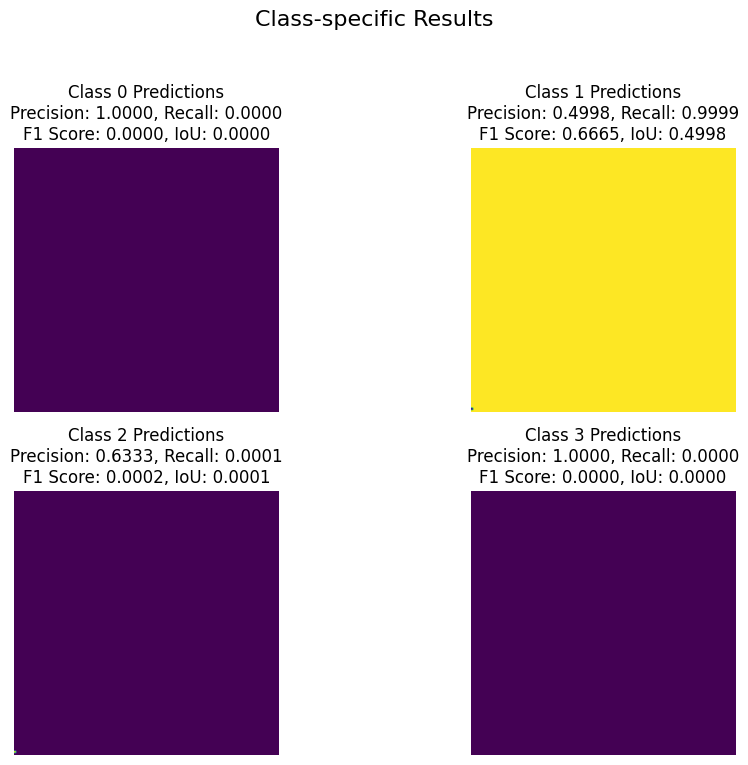

In [ ]:
# 'predictions' is model's output
threshold = 0.5
binary_masks = (predictions > threshold).astype(np.uint8)

# 'ground_truth_masks' is ground truth data
# Replace this with your actual ground truth masks
ground_truth_masks = np.random.randint(0, 2, size=(30, 128, 128, 4), dtype=np.uint8)

# 'num_classes' is the number of classes
num_classes = 4

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Class-specific Results', fontsize=16)

# Loop through each class
for class_idx in range(num_classes):
    class_predictions = binary_masks[:, :, :, class_idx].flatten()

    # If I have ground truth masks, extract the binary masks for each class
    class_ground_truths = ground_truth_masks[:, :, :, class_idx].flatten()

    precision, recall, f1_score, _ = precision_recall_fscore_support(
        class_ground_truths, class_predictions, average='binary', zero_division=1
    )

    iou = jaccard_score(class_ground_truths, class_predictions)

    row_idx = class_idx // 2
    col_idx = class_idx % 2

    # Visualize Class-specific Results in the subplot
    axs[row_idx, col_idx].imshow(binary_masks[0, :, :, class_idx], cmap='viridis')
    axs[row_idx, col_idx].set_title(f'Class {class_idx } Predictions\n'
                                    f'Precision: {precision:.4f}, Recall: {recall:.4f}\n'
                                    f'F1 Score: {f1_score:.4f}, IoU: {iou:.4f}')
    axs[row_idx, col_idx].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

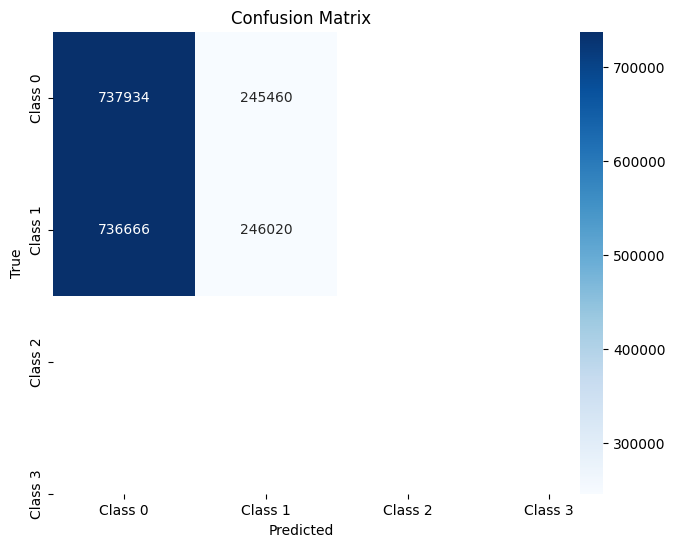

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Flatten predictions and ground truths
flat_predictions = binary_masks.flatten()
flat_ground_truths = ground_truth_masks.flatten()

# Generate confusion matrix
conf_matrix = confusion_matrix(flat_ground_truths, flat_predictions)

# Visualize confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1", "Class 2", "Class 3"],
            yticklabels=["Class 0", "Class 1", "Class 2", "Class 3"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

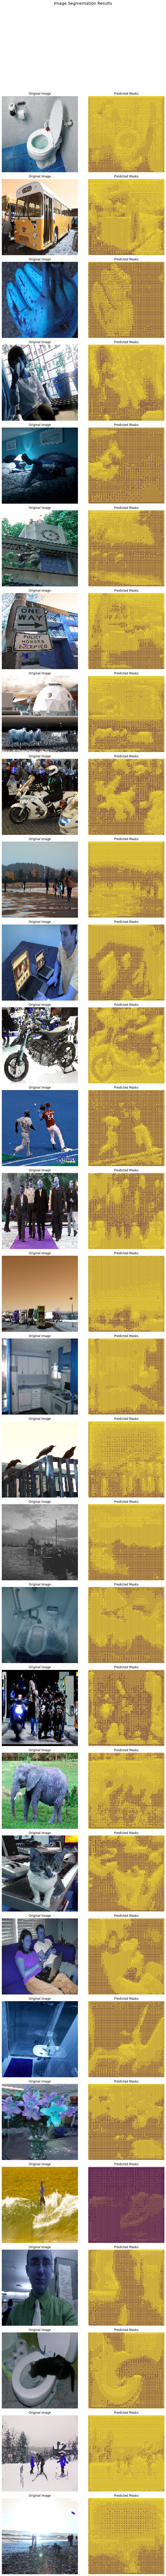

In [ ]:
num_images = len(test_images)
# Create a subplot grid
fig, axs = plt.subplots(num_images, 2, figsize=(10, 5 * num_images))
fig.suptitle('Image Segmentation Results', fontsize=16)

# Loop through each test image
for i in range(num_images):
    # Get the model's prediction
    model_prediction = predictions[i]

    # Plot the original image
    axs[i, 0].imshow(test_images[i])
    axs[i, 0].set_title('Original Image')
    axs[i, 0].axis('off')

    # Threshold the probability map to get a binary mask for each class
    binary_masks = (model_prediction > 0.12).astype(np.uint8)

    # Plot the binary masks for each class
    for class_idx in range(num_classes):
        axs[i, 1].imshow(binary_masks[:, :, class_idx], cmap='viridis', alpha=0.5)
        axs[i, 1].set_title('Predicted Masks')
        axs[i, 1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

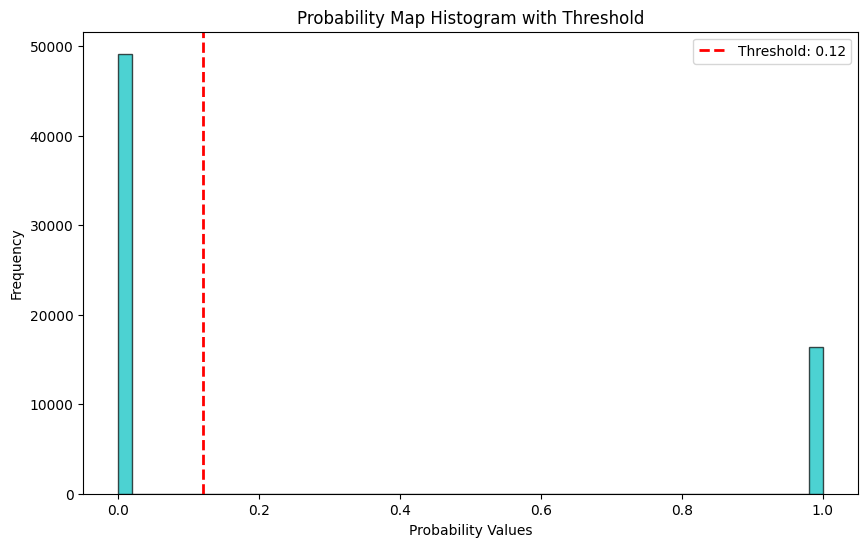

In [ ]:
from scipy.signal import find_peaks, peak_prominences
hist, bin_edges = np.histogram(model_prediction.flatten(), bins=50)

# Find peaks in the histogram
peaks, _ = find_peaks(hist)

# Calculate peak prominences
prominences = peak_prominences(hist, peaks)[0]

# Find the peak with the minimum prominence (valley between peaks)
min_prominence_peak = np.argmin(prominences)

# Use the bin edge corresponding to the valley as the threshold
threshold = bin_edges[peaks[min_prominence_peak] + 1]

# Apply thresholding
binary_mask = (model_prediction > threshold).astype(np.uint8)

# Visualize the threshold and binary mask
plt.figure(figsize=(10, 6))

# Plot histogram
plt.hist(model_prediction.flatten(), bins=50, color='c', edgecolor='k', alpha=0.7)

# Highlight the chosen threshold
plt.axvline(x=threshold, color='r', linestyle='--', linewidth=2, label=f'Threshold: {threshold:.2f}')

plt.title('Probability Map Histogram with Threshold')
plt.xlabel('Probability Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()